---
# The Perceptron Learning Algorithm
## Iris Species Binary Classification 

In this notebook we implement the *perceptron learning algorithm* for binary species classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


### Task
Our task will be to classify setosa and versicolor species using two feature measures, such as sepal length and sepal width. In order to do this we will need the following libraries:

* [matplotlib](https://matplotlib.org)
* [pandas](https://pandas.pydata.org)
* [matplotlib](http://matplotlib.org)

---

In [21]:
# import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import datasets from sklearn which contains the iris data
from sklearn import datasets

# load the iris data (specifying type as data frames)
iris = datasets.load_iris(as_frame=True)

In [22]:
df = iris.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


---

The iris data set contains information regarding three types of flowers: -, -, and -. The variables will use from this data will be . We will use the following __. 

In the following code cell we extract our data to numpy arrays.

---

In [15]:
df = iris.frame
df = df.iloc[:100]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [16]:
df_classify = df[["sepal length (cm)", "sepal width (cm)", "target"]]
df_classify["ones"] = np.ones(100)

<ipython-input-16-ade4883369f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify["ones"] = np.ones(100)


In [17]:
for i in range(100):
    if df_classify["target"].iloc[i] == 0:
        df_classify["target"].iloc[i] = 1.0
    else:
        df_classify["target"].iloc[i] = -1.0

/Users/geovaniiramirez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/geovaniiramirez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [18]:
X = df_classify[["sepal length (cm)", "sepal width (cm)", "ones"]].to_numpy()
y = df_classify["target"].to_numpy()

----
<h2>Visualization of Data</h2>

Often times, when working with data, we want to learn something from it. Are there outliers? Does it follow a specific distribution? One of the best ways to learn this is to simply by plotting the data and see how it looks like. We learn a lot just by looking at it.
___

Text(0.5, 1.0, 'Iris Data Plot')

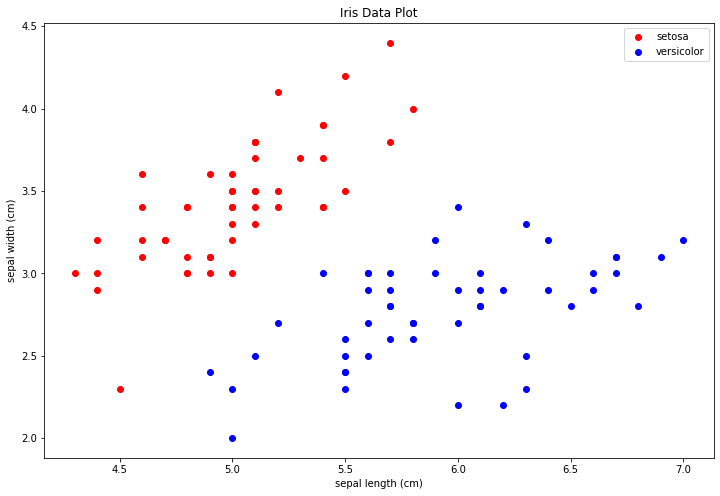

In [20]:
plt.figure(figsize = (12, 8))

plt.scatter(X[:50, 0],
            X[:50, 1], 
            label = 'setosa', 
            color = 'r')

plt.scatter(X[50:, 0], 
            X[50:, 1], 
            label = 'versicolor', 
            color = 'blue')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")

As we can see, the data seems to be evenly split into two subgroups with all the setosa data being in the top left corner and versicolor being at the bottom right corner. Now we look at the components of a Perceptron, which we will use to come up with a predictive classification our model.

---

<h2>Neuron</h2>

<p>The neuron takes in inputs from several other neurons and adds those inputs into a weighted sum. If the weighted sum crosses a certain threshold determined by the activation function, then it will generate an output based on that.</p>


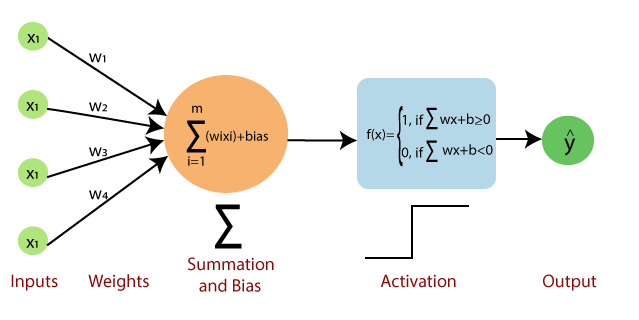


$
\hat{y}^{i} = \text{sign}(w^{T}\bar{x}^{i})
$


We obviously need our activation function, the sign function, so we define this function in the following code cell.

---

In [48]:
def sign(x, y):
    # the input vectors here should be numpy arrays
    if x @ y > 0:
        return 1.0
    else:
        return -1.0
    
def L(w, features = X, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))

In [49]:
w = np.random.rand(3)
print(L(w))

100.0


---
### The Gradient Approximation Update Rule

If a network was perfectly calibrated then our binary classifer would indicate a 1 if it was a satosa or a 0 if it was something else. In practice, however this is not always the case. Instead, we might get a percentage of how confident the model is of its own predictions. To quantify this, machine learning algoritihms often use a cost function to let its model know how incorrect our model's estimate of the ideal y is. One of the methods used is the Gradient Approximation update rule (GAUR).


The GAUR performs a parameter update for each training example using the previous iterations to learn how to better calibrate the model. In essensce, we follow the direction of the slope until we the lowest point of a valley.
$
w \rightarrow w - \alpha(\hat{y}^{i} - y^{i})\bar{x}^{i}
$

We can see how well it does after implementing this rule to our previous output.

---

In [50]:
def grad_approx(w, x, y):
    return (sign(w,x) - y)*x

# set epochs
epochs = 5000

# set alpha
alpha = .5

The Loss before implementing stochastic approx gradient descent = 100.0
The Loss after implementing stochastic approx gradient descent = 2.0


Text(0.5, 1.0, 'Losses of Gradient Descent')

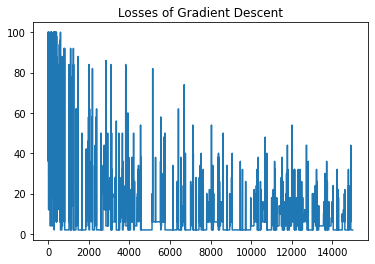

In [51]:
w = np.random.rand(3)
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")
losses = []
for epoch in range(epochs+10000):
    random_index = np.random.randint(100)
    w = w - alpha*grad_approx(w, X[random_index], y[random_index])
    losses.append(L(w))
print(f"The Loss after implementing stochastic approx gradient descent = {L(w)}")
plt.plot(losses)
plt.title('Losses of Gradient Descent')

As we can see the loss function went from 100 to 2 after implementing Gradient descent! If we look at our graph, we notice that GD performed frequent updates with a high variance causing the objective function to fluctuate heavily. We can also use other forms of Gradient Descent to get better results. A perfect example would be Batch gradient descent.

The Loss before implementing batch approx gradient descent = 100.0
The Loss after implementing batch approx gradient descent = 0.0


Text(0.5, 1.0, 'Losses of Batch Gradient Descent')

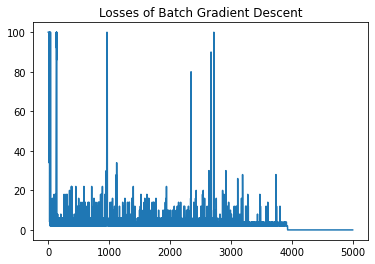

In [55]:
w = np.random.rand(3)
print(f"The Loss before implementing batch approx gradient descent = {L(w)}")
losses = []
batch_size = 30
for epoch in range(epochs):
    batch_grad = np.zeros(3)
    for _ in range(batch_size):
        random_index = np.random.randint(100)
        batch_grad += grad_approx(w, X[random_index], y[random_index]) 
    w = w - alpha*batch_grad
    losses.append(L(w))
print(f"The Loss after implementing batch approx gradient descent = {L(w)}")
plt.plot(losses)
plt.title('Losses of Batch Gradient Descent')

In [56]:
def full_grad_approx(w, features=X, labels=y):
    return sum((sign(w,x) - labels[i])*x for i, x in enumerate(features))

The Loss before implementing stochastic approx gradient descent = 100.0
The Loss after implementing stochastic approx gradient descent = 0.0


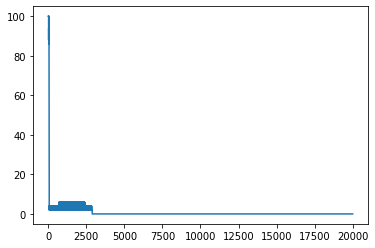

In [57]:
w = np.random.rand(3)
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")
losses = []
for epoch in range(20000):
    w = w - alpha*full_grad_approx(w)
    losses.append(L(w))
print(f"The Loss after implementing stochastic approx gradient descent = {L(w)}")
plt.plot(losses)

----

We have defined a hyperplane in 3-dimentional space by 

$
z = w_0*x_1 + w_1*x_2 + w_2
$

Setting $z = 0$, and solving for $x_2$, we have 

$
x_2 = \frac{w_0x_1 + w_2}{-w_1}
$

----

Text(0.5, 1.0, 'Iris Data Plot')

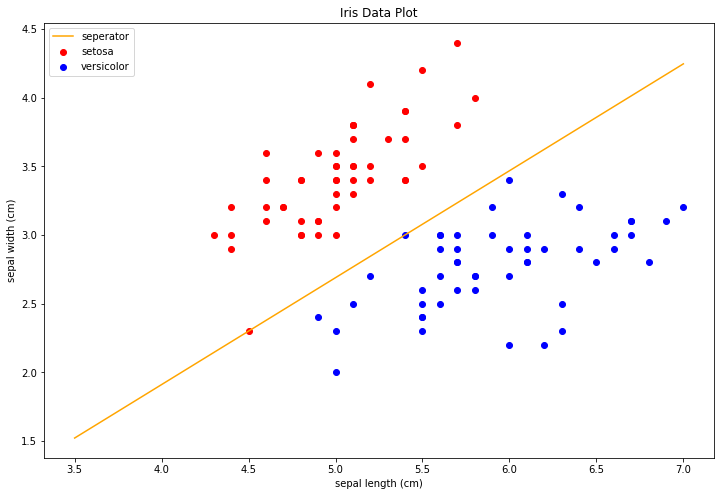

In [50]:
domain = np.arange(3.5, 7.5, .5)
line = [(w[0]*x + w[2])/-w[1] for x in domain]


plt.figure(figsize = (12, 8))

plt.scatter(X[:50, 0],
            X[:50, 1], 
            label = 'setosa', 
            color = 'r')

plt.scatter(X[50:, 0], 
            X[50:, 1], 
            label = 'versicolor', 
            color = 'blue')

plt.plot(domain, 
         line, 
         label = 'seperator', 
         color='orange')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")